In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [42]:
batting_avg=pd.read_csv('Resources/batting_average.csv')

In [43]:
batting_avg.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,MA Agarwal,2020-2020,3,3,0,36,32,12.00,39,92.30,0,0,0,6,0
1,KK Ahmed,2018-2019,11,3,1,9,5,4.50,17,52.94,0,0,0,1,0
2,JJ Bumrah,2016-2020,64,15,10,19,10*,3.80,44,43.18,0,0,4,2,1
3,YS Chahal,2016-2020,52,9,3,49,18*,8.16,84,58.33,0,0,1,7,0
4,DL Chahar,2018-2019,3,2,1,18,12,18.00,22,81.81,0,0,0,1,0


In [44]:
batting_avg.rename(columns={'  Player':'Player','  Span':'Span','  Mat':'Matches','  NO':'Not_Outs','  Inns':'Innings','  Ave':'Batting_Average','  SR':'Strike_Rate','  100':'Centuries','  0':'Zeros','  HS':'Highest_Score','  BF':'Balls_Faced','  50':'Fifties','  4s':'Fours','  6s':'Sixes','  Runs':'Runs'},inplace=True)
batting_avg.columns

Index(['Player', 'Span', 'Matches', 'Innings', 'Not_Outs', 'Runs',
       'Highest_Score', 'Batting_Average', 'Balls_Faced', 'Strike_Rate',
       'Centuries', 'Fifties', 'Zeros', 'Fours', 'Sixes'],
      dtype='object')

In [45]:
batting_avg.head()

,Player,Span,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike_Rate,Centuries,Fifties,Zeros,Fours,Sixes
0,MA Agarwal,2020-2020,3,3,0,36,32,12.00,39,92.30,0,0,0,6,0
1,KK Ahmed,2018-2019,11,3,1,9,5,4.50,17,52.94,0,0,0,1,0
2,JJ Bumrah,2016-2020,64,15,10,19,10*,3.80,44,43.18,0,0,4,2,1
3,YS Chahal,2016-2020,52,9,3,49,18*,8.16,84,58.33,0,0,1,7,0
4,DL Chahar,2018-2019,3,2,1,18,12,18.00,22,81.81,0,0,0,1,0


In [46]:
players=batting_avg.shape[0]
features=batting_avg.shape[1]

In [47]:
for column in batting_avg.columns:
    batting_avg.loc[batting_avg[column]=='-',column]=np.nan

In [48]:
batting_avg

,Player,Span,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike_Rate,Centuries,Fifties,Zeros,Fours,Sixes
0,MA Agarwal,2020-2020,3.0,3,0,36,32,12.00,39,92.30,0,0,0,6,0
1,KK Ahmed,2018-2019,11.0,3,1,9,5,4.50,17,52.94,0,0,0,1,0
2,JJ Bumrah,2016-2020,64.0,15,10,19,10*,3.80,44,43.18,0,0,4,2,1
3,YS Chahal,2016-2020,52.0,9,3,49,18*,8.16,84,58.33,0,0,1,7,0
4,DL Chahar,2018-2019,3.0,2,1,18,12,18.00,22,81.81,0,0,0,1,0
5,S Dhawan,2010-2020,136.0,133,7,5688,143,45.14,6050,94.01,17,29,5,710,69
6,MS Dhoni,2004-2019,347.0,294,83,10599,183*,50.23,12164,87.13,9,73,10,809,222
7,S Dube,2019-2019,1.0,1,0,9,9,9.00,6,150.00,0,0,0,1,0
8,SS Iyer,2017-2020,18.0,16,1,748,103,49.86,742,100.80,1,8,0,73,17
9,RA Jadeja,2009-2020,165.0,110,38,2296,87,31.88,2671,85.96,0,12,6,172,43


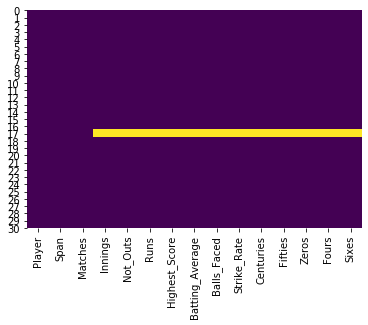

In [49]:
sns.heatmap(batting_avg.isnull(),yticklabels=True,cbar=False,cmap='viridis')

In [50]:
# add=0
# count=0
# for val in batting_avg['Strike_Rate']:
#     if val!=np.nan:
#         add+=float(val)
#         count+=1
#         print(add,count)
# mean=add/count
# print(mean)
batting_avg=batting_avg.drop([17])

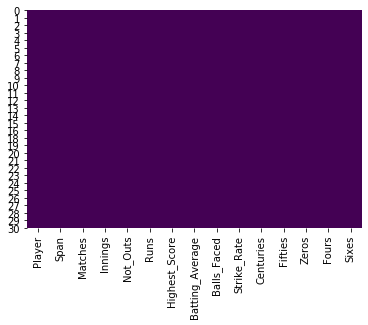

In [51]:
sns.heatmap(batting_avg.isnull(),yticklabels=True,cbar=False,cmap='viridis')

In [52]:
batting_avg.columns

Index(['Player', 'Span', 'Matches', 'Innings', 'Not_Outs', 'Runs',
       'Highest_Score', 'Batting_Average', 'Balls_Faced', 'Strike_Rate',
       'Centuries', 'Fifties', 'Zeros', 'Fours', 'Sixes'],
      dtype='object')

In [53]:
Batting_Average=batting_avg['Batting_Average'].to_numpy().astype('float64')
Innings=batting_avg['Innings'].to_numpy().astype('float64')
Strike_Rate=batting_avg['Strike_Rate'].to_numpy().astype('float64')
Centuries=batting_avg['Centuries'].to_numpy().astype('float64')
Fifties=batting_avg['Fifties'].to_numpy().astype('float64')
Zeros=batting_avg['Zeros'].to_numpy().astype('float64')
Runs=batting_avg['Runs'].to_numpy().astype('int')
Highest_Score=batting_avg['Highest_Score'].to_numpy()

In [201]:
Zeros+8.7*Innings

array([  26.1,   26.1,  134.5,   79.3,   17.4, 1162.1, 2567.8,    8.7,
        139.2,  963. ,  454.4,  693.3,   18.4, 2092.3,  183.7,  460.4,
        318.2,  184.7,  333.6,  122.8,  271.7, 1701.8,  438. ,   17.4,
         69.6, 1900.9,   26.1,   17.4,   53.2,  212.8])

In [202]:
Highest_Score

array(['32', '5', '10*', '18*', '12', '143', '183*', '9', '103', '87',
       '120', '79', '1', '183', '19', '53*', '25', '104*', '83', '71',
       '112', '116*', '124*', '45', '46', '264', '40', '9', '22*', '18*'],
      dtype=object)

In [203]:
Highest_Score_updated=[]
for s in Highest_Score:
    if s[-1]=='*':
        s=s.replace('*','')
    Highest_Score_updated.append(int(s))
Highest_Score=np.array(Highest_Score_updated,dtype=float)
type(Highest_Score),type(Highest_Score[0])    

(numpy.ndarray, numpy.float64)

In [204]:
Highest_Score

array([ 32.,   5.,  10.,  18.,  12., 143., 183.,   9., 103.,  87., 120.,
        79.,   1., 183.,  19.,  53.,  25., 104.,  83.,  71., 112., 116.,
       124.,  45.,  46., 264.,  40.,   9.,  22.,  18.])

In [205]:
#Innings
Consistency_Innings=[]
for inning in Innings:
    if inning>=1 and inning<=49:
        Consistency_Innings.append(1)
    elif inning>=50 and inning<=99:
        Consistency_Innings.append(2)
    elif inning>=100 and inning<=124:
        Consistency_Innings.append(3)
    elif inning>=125 and inning<=149:
        Consistency_Innings.append(4)
    elif inning>=150:
        Consistency_Innings.append(5)
Consistency_Innings=np.array(Consistency_Innings)

Form_Innings=[]
for inning in Innings:
    if inning>=1 and inning<=4:
        Form_Innings.append(1)
    elif inning>=5 and inning<=9:
        Form_Innings.append(2)
    elif inning>=10 and inning<=11:
        Form_Innings.append(3)
    elif inning>=12 and inning<=14:
        Form_Innings.append(4)
    elif inning>=15:
        Form_Innings.append(5)
Form_Innings=np.array(Form_Innings)

Opposition_Innings=[]
for inning in Innings:
    if inning>=1 and inning<=2:
        Opposition_Innings.append(1)
    elif inning>=3 and inning<=4:
        Opposition_Innings.append(2)
    elif inning>=5 and inning<=6:
        Opposition_Innings.append(3)
    elif inning>=7 and inning<=9:
        Opposition_Innings.append(4)
    elif inning>=10:
        Opposition_Innings.append(5)
Opposition_Innings=np.array(Opposition_Innings)

Venue_Innings=[]
for inning in Innings:
    if inning==1:
        Venue_Innings.append(1)
    elif inning==2:
        Venue_Innings.append(2)
    elif inning==3:
        Venue_Innings.append(3)
    elif inning==4:
        Venue_Innings.append(4)
    elif inning>=5:
        Venue_Innings.append(5)
Venue_Innings=np.array(Venue_Innings)
print(Consistency_Innings,len(Consistency_Innings))
print(Form_Innings,len(Form_Innings))
print(Opposition_Innings,len(Opposition_Innings))
print(Venue_Innings,len(Venue_Innings))

[1 1 1 1 1 4 5 1 1 3 2 2 1 5 1 2 1 1 1 1 1 5 2 1 1 5 1 1 1 1] 30
[1 1 5 2 1 5 5 1 5 5 5 5 1 5 5 5 5 5 5 4 5 5 5 1 2 5 1 1 2 5] 30
[2 2 5 4 1 5 5 1 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 1 4 5 2 1 3 5] 30
[3 3 5 5 2 5 5 1 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 2 5 5 3 2 5 5] 30


In [206]:
#Batting Avg
Batting_Average_all=[]
for bt in Batting_Average:
    if bt<=9.99:
        Batting_Average_all.append(1)
    elif bt>=10.00 and bt<=19.99:
        Batting_Average_all.append(2)
    elif bt>=20.00 and bt<=29.99:
        Batting_Average_all.append(3)
    elif bt>=30.00 and bt<=39.99:
        Batting_Average_all.append(4)
    elif bt>=40:
        Batting_Average_all.append(5)
Batting_Average_all=np.array(Batting_Average_all)
print(Batting_Average_all,len(Batting_Average_all))

[2 1 1 1 2 5 5 1 5 4 5 4 1 5 2 2 1 4 3 3 5 4 5 5 4 5 3 1 2 1] 30


In [207]:
#Strike Rate
Strike_Rate_all=[]
for st in Strike_Rate:
    if st<=49.99:
        Strike_Rate_all.append(1)
    elif st>=50.00 and st<=59.99:
        Strike_Rate_all.append(2)
    elif st>=60.00 and st<=79.99:
        Strike_Rate_all.append(3)
    elif st>=80.00 and st<=99.99:
        Strike_Rate_all.append(4)
    elif st>=100.00:
        Strike_Rate_all.append(5)
Strike_Rate_all=np.array(Strike_Rate_all)
print(Strike_Rate_all,len(Strike_Rate_all))

[4 2 1 2 4 4 4 5 5 4 5 3 1 4 3 3 4 4 5 5 4 4 3 4 4 4 5 2 5 2] 30


In [210]:
Centuries,len(Centuries)

(array([ 0.,  0.,  0.,  0.,  0., 17.,  9.,  0.,  1.,  0.,  2.,  0.,  0.,
        43.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,  5.,  3.,  0.,  0., 29.,
         0.,  0.,  0.,  0.]), 30)

In [212]:
#Centuries
Consistency_Centuries=[]
for c in Centuries:
    if c>=0 and c<=4:
        Consistency_Centuries.append(1)
    elif c>=5 and c<=9:
        Consistency_Centuries.append(2)
    elif c>=10 and c<=14:
        Consistency_Centuries.append(3)
    elif c>=15 and c<=19:
        Consistency_Centuries.append(4)
    elif c>=20:
        Consistency_Centuries.append(5)
Consistency_Centuries=np.array(Consistency_Centuries)

Form_Centuries=[]
for c in Centuries:
    if c==0 or c==1:
        Form_Centuries.append(1)
    elif c==2:
        Form_Centuries.append(2)
    elif c==3:
        Form_Centuries.append(3)
    elif c==4:
        Form_Centuries.append(4)
    elif c>=5:
        Form_Centuries.append(5)
Form_Centuries=np.array(Form_Centuries)

Opposition_Centuries=[]
for c in Centuries:
    if c==0 or c==1:
        Opposition_Centuries.append(3)
    elif c==2:
        Opposition_Centuries.append(4)
    elif c>=3:
        Opposition_Centuries.append(5)
Opposition_Centuries=np.array(Opposition_Centuries)

Venue_Centuries=[]
for c in Centuries:
    if c==1 or c==0:
        Venue_Centuries.append(4)
    elif c>=2:
        Venue_Centuries.append(5)
Venue_Centuries=np.array(Venue_Centuries)
print(Consistency_Centuries,len(Consistency_Centuries))
print(Form_Centuries,len(Form_Centuries))
print(Opposition_Centuries,len(Opposition_Centuries))
print(Venue_Centuries,len(Venue_Centuries))

[1 1 1 1 1 4 2 1 1 1 1 1 1 5 1 1 1 1 1 1 1 2 1 1 1 5 1 1 1 1] 30
[1 1 1 1 1 5 5 1 1 1 2 1 1 5 1 1 1 1 1 1 4 5 3 1 1 5 1 1 1 1] 30
[3 3 3 3 3 5 5 3 3 3 4 3 3 5 3 3 3 3 3 3 5 5 5 3 3 5 3 3 3 3] 30
[4 4 4 4 4 5 5 4 4 4 5 4 4 5 4 4 4 4 4 4 5 5 5 4 4 5 4 4 4 4] 30


In [213]:
#Fifties
Consistency_Fifties=[]
for inning in Fifties:
    if inning>=0 and inning<=9:
        Consistency_Fifties.append(1)
    elif inning>=10 and inning<=19:
        Consistency_Fifties.append(2)
    elif inning>=20 and inning<=29:
        Consistency_Fifties.append(3)
    elif inning>=30 and inning<=39:
        Consistency_Fifties.append(4)
    elif inning>=40:
        Consistency_Fifties.append(5)
    else:
        Consistency_Fifties.append(0)
Consistency_Fifties=np.array(Consistency_Fifties)

Form_Fifties=[]
for inning in Fifties:
    if inning>=0 and inning<=2:
        Form_Fifties.append(1)
    elif inning>=3 and inning<=4:
        Form_Fifties.append(2)
    elif inning>=5 and inning<=6:
        Form_Fifties.append(3)
    elif inning>=7 and inning<=9:
        Form_Fifties.append(4)
    elif inning>=10:
        Form_Fifties.append(5)
Form_Fifties=np.array(Form_Fifties)

Opposition_Fifties=[]
for inning in Fifties:
    if inning>=0 and inning<=2:
        Opposition_Fifties.append(1)
    elif inning>=3 and inning<=4:
        Opposition_Fifties.append(2)
    elif inning>=5 and inning<=6:
        Opposition_Fifties.append(3)
    elif inning>=7 and inning<=9:
        Opposition_Fifties.append(4)
    elif inning>=10:
        Opposition_Fifties.append(5)
Opposition_Fifties=np.array(Opposition_Fifties)

Venue_Fifties=[]
for inning in Fifties:
    if inning==1 or inning==0:
        Venue_Fifties.append(4)
    elif inning>=2:
        Venue_Fifties.append(5)
    else:
        Venue_Fifties.append(0)
Venue_Fifties=np.array(Venue_Fifties)
print(Consistency_Fifties,len(Consistency_Fifties))
print(Form_Fifties,len(Form_Fifties))
print(Opposition_Fifties,len(Opposition_Fifties))
print(Venue_Fifties,len(Venue_Fifties))

[1 1 1 1 1 3 5 1 1 2 1 1 1 5 1 1 1 1 1 1 1 4 2 1 1 5 1 1 1 1]
[1 1 1 1 1 5 5 1 4 5 3 4 1 5 1 1 1 1 2 1 4 5 5 1 1 5 1 1 1 1]
[1 1 1 1 1 5 5 1 4 5 3 4 1 5 1 1 1 1 2 1 4 5 5 1 1 5 1 1 1 1]
[4 4 4 4 4 5 5 4 5 5 5 5 4 5 4 4 4 5 5 4 5 5 5 4 4 5 4 4 4 4]


In [214]:
#Zeros
Consistency_Zeros=[]
for inning in Zeros:
    if inning>=0 and inning<=4:
        Consistency_Zeros.append(1)
    elif inning>=5 and inning<=9:
        Consistency_Zeros.append(2)
    elif inning>=10 and inning<=14:
        Consistency_Zeros.append(3)
    elif inning>=15 and inning<=19:
        Consistency_Zeros.append(4)
    elif inning>=20:
        Consistency_Zeros.append(5)
Consistency_Zeros=np.array(Consistency_Zeros)

Form_Zeros=[]
for inning in Zeros:
    if inning==1 or inning==0:
        Form_Zeros.append(1)
    elif inning==2:
        Form_Zeros.append(2)
    elif inning==3:
        Form_Zeros.append(3)
    elif inning==4:
        Form_Zeros.append(4)
    elif inning>=5:
        Form_Zeros.append(5)
Form_Zeros=np.array(Form_Zeros)

Opposition_Zeros=[]
for inning in Zeros:
    if inning==1 or inning==0:
        Opposition_Zeros.append(1)
    elif inning==2:
        Opposition_Zeros.append(2)
    elif inning==3:
        Opposition_Zeros.append(3)
    elif inning==4:
        Opposition_Zeros.append(4)
    elif inning>=5:
        Opposition_Zeros.append(5)
Opposition_Zeros=np.array(Opposition_Zeros)
print(Consistency_Zeros,len(Consistency_Zeros))
print(Form_Zeros,len(Form_Zeros))
print(Opposition_Zeros,len(Opposition_Zeros))

[1 1 1 1 1 2 3 1 1 2 1 2 1 3 1 2 2 1 1 1 1 3 1 1 1 3 1 1 1 1] 30
[1 1 4 1 1 5 5 1 1 5 2 5 1 5 1 5 5 2 3 1 2 5 3 1 1 5 1 1 1 4] 30
[1 1 4 1 1 5 5 1 1 5 2 5 1 5 1 5 5 2 3 1 2 5 3 1 1 5 1 1 1 4] 30


In [215]:
#Highest Score
Highest_Score_all=[]
for inning in Highest_Score:
    if inning>=1 and inning<=24:
        Highest_Score_all.append(1)
    elif inning>=25 and inning<=49:
        Highest_Score_all.append(2)
    elif inning>=50 and inning<=99:
        Highest_Score_all.append(3)
    elif inning>=100 and inning<=150:
        Highest_Score_all.append(4)
    elif inning>=150:
        Highest_Score_all.append(5)
Highest_Score_all=np.array(Highest_Score_all)
print(Highest_Score_all,len(Highest_Score_all))

[2 1 1 1 1 4 5 1 4 3 4 3 1 5 1 3 2 4 3 3 4 4 4 2 2 5 2 1 1 1] 30


In [216]:
Consitency= 0.4262*Batting_Average_all+0.2566*Consistency_Innings+0.1510*Strike_Rate_all+0.0787*Consistency_Centuries+0.0556*Consistency_Fifties-0.0328*Consistency_Zeros
Consitency

array([1.8145, 1.0863, 0.9353, 1.0863, 1.8145, 4.1774, 4.355 , 1.5393,
       3.2441, 3.2029, 3.5007, 2.7397, 0.9353, 4.5911, 1.6635, 1.8873,
       1.3555, 2.6669, 2.3917, 2.3917, 3.0931, 3.8732, 3.2543, 3.0931,
       2.6669, 4.5911, 2.3917, 1.0863, 1.9655, 1.0863])

In [217]:
Form = 0.4262*Batting_Average_all+ 0.2566*Form_Innings+ 0.1510*Strike_Rate_all + 0.0787*Form_Centuries +0.0556*Form_Fifties-0.0328*Form_Zeros 
Form

array([1.8145, 1.0863, 1.8633, 1.3429, 1.8145, 4.5255, 4.5255, 1.5393,
       4.4373, 3.7845, 4.4276, 3.5779, 0.9353, 4.5255, 2.6899, 2.5587,
       2.2835, 3.6605, 3.4081, 3.1615, 4.4896, 4.0993, 4.2827, 3.0931,
       2.9235, 4.5255, 2.3917, 1.0863, 2.2221, 2.0143])

In [218]:
Opposition = 0.4262*Batting_Average_all + 0.2566*Opposition_Innings + 0.1510*Strike_Rate_all + 0.0787*Opposition_Centuries +0.0556*Opposition_Fifties-0.0328*Opposition_Zeros 
Opposition

array([2.2285, 1.5003, 2.0207, 2.0135, 1.9719, 4.5255, 4.5255, 1.6967,
       4.5947, 3.9419, 4.585 , 3.7353, 1.0927, 4.5255, 2.8473, 2.7161,
       2.4409, 3.8179, 3.5655, 3.5755, 4.5683, 4.0993, 4.4401, 3.2505,
       3.5941, 4.5255, 2.8057, 1.2437, 2.6361, 2.1717])

In [219]:
Venue = 0.4262*Batting_Average_all + 0.2566*Venue_Innings+ 0.1510*Strike_Rate_all + 0.0787*Venue_Centuries +0.0556*Venue_Fifties + 0.0328*Highest_Score_all
Venue

array([2.829 , 2.068 , 2.4302, 2.5812, 2.5396, 4.8207, 4.8535, 2.0078,
       4.893 , 4.283 , 4.9717, 4.132 , 1.6604, 4.8535, 3.1584, 3.224 ,
       2.916 , 4.3158, 4.0078, 3.9522, 4.8207, 4.3945, 4.6697, 3.851 ,
       4.1946, 4.8535, 3.4062, 1.8114, 3.4604, 2.5812])

In [220]:
import matplotlib.pyplot as plt

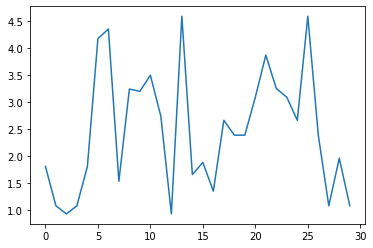

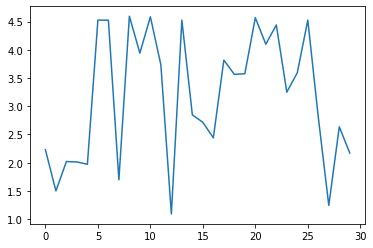

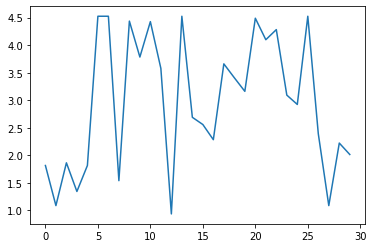

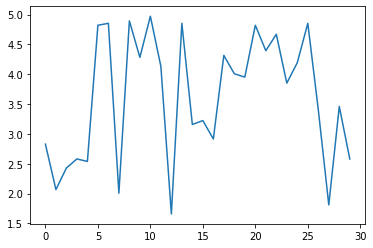

In [227]:
plt.plot(Consitency)
plt.show()
plt.plot(Opposition)
plt.show()
plt.plot(Form)
plt.show()
plt.plot(Venue)
plt.show()

In [ ]:
Runs_list=[]
for runs in Runs:
    if runs>=1 and runs<=24:
        Highest_Score_all.append(1)
    elif runs>=25 and runs<=49:
        Highest_Score_all.append(2)
    elif runs>=50 and runs<=99:
        Highest_Score_all.append(3)
    elif runs>=100 and runs<=150:
        Highest_Score_all.append(4)
    elif runs>=150:
        Highest_Score_all.append(5)
Highest_Score_all=np.array(Highest_Score_all)
print(Highest_Score_all,len(Highest_Score_all))